In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from numpy.random import normal
np.random.seed(37)


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.exp(z)

[1.99996534 0.14999278 0.49976397 0.20017282]


<AxesSubplot:>

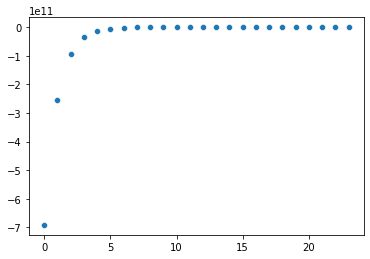

In [50]:
import _glm
import importlib
importlib.reload(_glm)
beta,llik = _glm.poissonr_optimizer(X,y,1000)
print(beta)
llik
sns.scatterplot(range(len(llik)),llik)


In [51]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor(fit_intercept=True)
clf.fit(X, y)
clf.coef_,clf.intercept_


(array([0.13554465, 0.44964595, 0.17958408]), 2.0302357295140374)

In [52]:
from numpy.random import normal
from scipy.stats import bernoulli
np.random.seed(37)


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.array([ bernoulli.rvs(p) for p in 1/(1 + np.exp(-z))])

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_,clf.intercept_

(array([[0.09258814, 0.45523283, 0.19295505]]), array([2.02078226]))

[2.02096359 0.09268011 0.45568358 0.19314621]
[0.38466390472253204, 0.3685063647671678, 0.36774863250640477, 0.36774514901141425, 0.3677451489246439, 0.36774514892464394]


<AxesSubplot:>

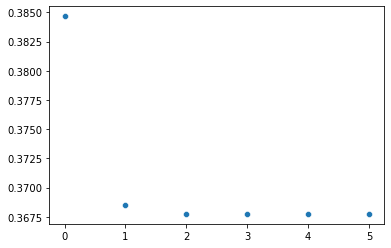

In [54]:
import _glm
import importlib
importlib.reload(_glm)
beta,llik = _glm.lr_optimizer(X,y,20)
print(beta)
print(llik)
sns.scatterplot(range(len(llik)),llik)

Test ppca code

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
data = load_iris()
X,y= data['data'],data['target']
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)



In [ ]:
import _ppca
import importlib
importlib.reload(_ppca)

W = _ppca.ppca(X,2,'eigen',n_iter=200)
dfw = pd.DataFrame(W)

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

sns.scatterplot(dfw.iloc[:,0],dfw.iloc[:,1])